In [27]:
from stompy.plot import nbviz
from stompy import utils
import six
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
import stompy.model.delft.dflow_model as dfm

In [33]:
from stompy.grid import multi_ugrid
six.moves.reload_module(multi_ugrid)
six.moves.reload_module(dfm)
mod=dfm.DFlowModel.load("data_2016long_3d_asbuilt_impaired_scen0_l100-v027rbreach")

In [34]:
mds=mod.map_dataset()

INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Removing orphaned nodes
INFO:UnstructuredGrid:0 nodes found to be orphans
INFO:UnstructuredGrid:Removing duplicate nodes
INFO:UnstructuredGrid:Renumbering nodes
INFO:UnstructuredGrid:Renumbering edges
INFO:UnstructuredGrid:Extracting grid boundary
INFO:UnstructuredGrid:Regenerating edges
INFO:UnstructuredGrid:Remo

INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)
INFO:UnstructuredGrid:max_sides is okay (4)


<IPython.core.display.Javascript object>


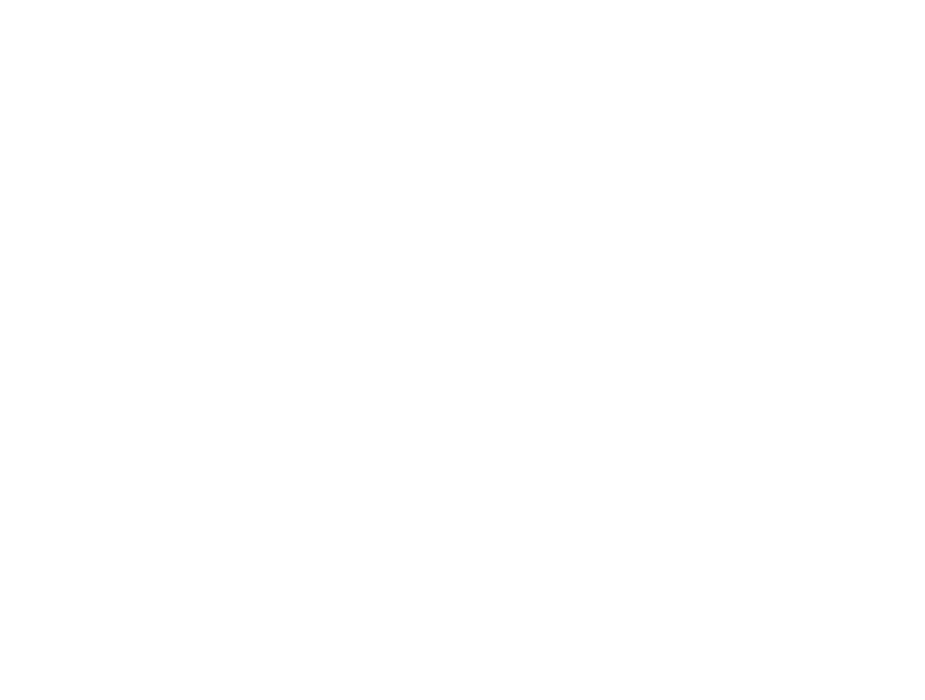

NBViz(children=(HBox(children=(Play(value=0, description='Press play', interval=50, max=105), IntSlider(value=…

ValueError: Collections can only map rank 1 arrays

In [32]:
six.moves.reload_module(nbviz)

viz=nbviz.NBViz([mds])
viz.add_layer(viz.datasets[0], 'mesh2d_marsh')
viz

In [37]:
scal.dims

('mesh2d_nFaces', 'mesh2d_nLayers')

In [41]:
mds.dims

Frozen(SortedKeysDict({'mesh2d_nNodes': 3411, 'mesh2d_nEdges': 8970, 'Two': 2, 'mesh2d_nFaces': 5560, 'mesh2d_nMax_face_nodes': 4, 'mesh2d_nLayers': 100, 'mesh2d_nInterfaces': 101, 'time': 106}))

<IPython.core.display.Javascript object>


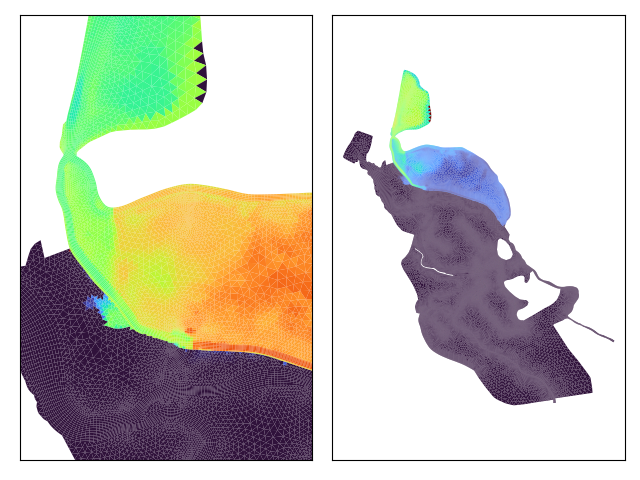

In [43]:
fig,axs=plt.subplots(1,2)
for ax in axs:
    ax.set_adjustable('datalim')
    ax.xaxis.set_visible(0)
    ax.yaxis.set_visible(0)
tidx=100

for ax,dye in zip(axs,['mesh2d_marsh','mesh2d_pond']):
    scal=mds[dye].isel(time=tidx).compute()
    scal=scal.mean(dim='mesh2d_nLayers')

    ccoll=mds.grid.plot_cells(values=scal,cmap='turbo',ax=ax)
    ccoll.set_clim([0,1])
fig.tight_layout()
